In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):

    xtrans = np.transpose(X)
    xtx = np.dot(xtrans, X)
    invxtx = np.linalg.inv(xtx)
    invxtxxt = np.dot(invxtx, xtrans)
    w = np.dot(invxtxxt, y)
    return w

In [4]:
def testOLERegression(w,Xtest,ytest):
    rmse = 0
    wtrans = np.transpose(w)
    for i in range(0, len(Xtest)):
        rmse += np.square(ytest[i] - np.dot(wtrans, Xtest[i])) /len(Xtest)
    rmse = np.sqrt(rmse)
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i  = np.concatenate((np.ones(( Xtest.shape[0],1)), Xtest), axis=1)

w =   learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [7]:

def regressionObjVal(w, X, y):
    a = np.dot(X,w)
    d = np.zeros(len(y))
    for i in range(len(d)):
        d[i]=y[i][0]
    bb = d -a
    cc = np.dot(np.transpose(bb),bb)
    
    error= cc/2
    return error

In [8]:
def regressionGradient(w, X, y):
    a = np.dot(np.transpose(X), np.dot(X,w))
    b = np.dot(np.transpose(X), y)

    bb = np.zeros(len(a))
    for i in range(len(a)):
        bb[i]=b[i][0]
    error_grad = np.subtract(a,bb)
    return error_grad

In [9]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.10
Gradient Descent Linear Regression RMSE on test data - 54.98


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [10]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [11]:
def predictLinearModel(w,Xtest):

    ypred = np.zeros([Xtest.shape[0],1])
    for i in range(len(Xtest)):
        if(np.dot(np.transpose(w),Xtest[i])<0):
            ypred[i]=-1
        else:
            ypred[i]= 1
    return ypred

In [12]:
def evaluateLinearModel(w,Xtest,ytest):

    ypred = predictLinearModel(w,Xtest)

    acc = 0
    for i in range(len(Xtest)):
        if(ypred[i] == ytest[i]):
            acc+=1
    return acc/len(Xtest)

In [13]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w1 = np.transpose(np.array(soln.x))
w1 = w1[:,np.newaxis]

acc = evaluateLinearModel(w1,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w1,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [14]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [15]:
def logisticObjVal(w, X, y):
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    for i in range(len(X)):
        exp_part = np.exp(np.dot(-y[i],np.dot(np.transpose(w), X[i])))
        log_part = np.log(1+exp_part)
        error+=log_part
   
    return error/len(X)


In [16]:
def logisticGradient(w, X, y):

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    gradient = np.zeros((w.shape[0],))
    for i in range(len(y)):
        exp_part = np.exp(np.dot(y[i], np.dot(np.transpose(w), X[i])))
        y_part = y[i]/(1+exp_part)

        dot_part = np.dot(y_part[0], X[i])
        
        gradient+= dot_part


    return gradient/(-len(y))

In [17]:
def logisticHessian(w, X, y):


    bb = np.dot(X,np.transpose(X))
    if len(w.shape) == 1:
        w = w[:,np.newaxis]

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.eye(X.shape[1])
    for i in range(len(y)):
        exp_part = np.exp(np.dot(y[i], np.dot(np.transpose(w),X[i])))
        division_part = exp_part/np.square(1+exp_part)
        sum_part = np.dot(division_part,np.dot(X[i],np.transpose(X[i])))
        hessian+=sum_part
    hessian/=len(X)

    return hessian

In [18]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)

w2 = np.transpose(np.array(soln.x))
w2 = np.reshape(w2,[len(w2),1])

acc = evaluateLinearModel(w2,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w2,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.85


### Problem 5 - Support Vector Machines Using Gradient Descent

In [19]:
import random
def trainSGDSVM(X,y,T,eta=0.01):
    w = np.zeros([X.shape[1],1])
    for t in range(T ):
        i = random.randint(1, len(X)-1)
        a = np.dot(w.T, X[i])
        b = np.dot(y[i],a)
        if(b<1):
            for j in range((X.shape[1])):
                w[j][0]+=X[i][j]*y[i]
    return w*eta

In [24]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w3 = trainSGDSVM(Xtrain_i,ytrain,100,0.1)
acc = evaluateLinearModel(w3,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w3,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.86
SVM Accuracy on test data - 0.86


### Problem 6 - Plotting decision boundaries

In [21]:
print('Problem 6')
print('---------')

Problem 6
---------


In [22]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5,1,'SVM')

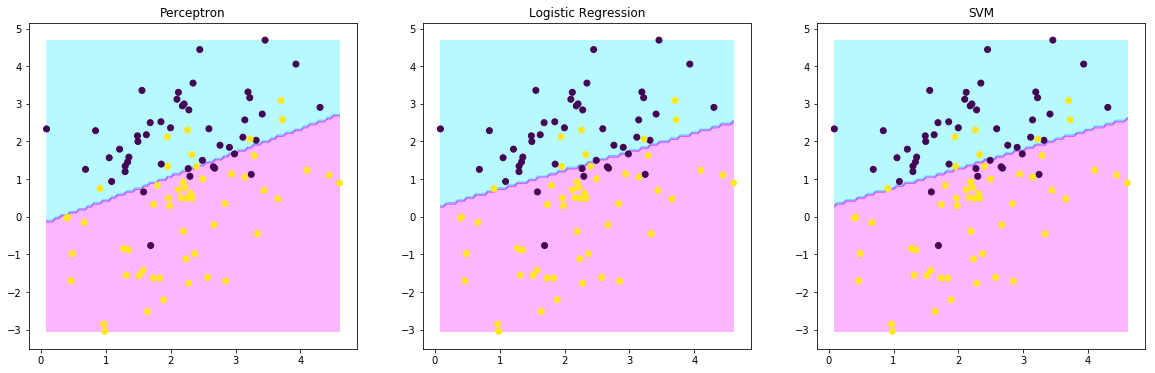

In [23]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods

w_perceptron = w1
w_logistic = w2
w_svm = w3
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
